<a href="https://colab.research.google.com/github/Sandhiyaav/23IT046-aiml/blob/main/Copy_of_AIML_data_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/content/supermarket_sales.csv')  # path in Colab
print("First 5 rows:")
display(df.head())

# Dataset info and missing values
print("\nDataset info:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)

# Encode categorical columns
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df = pd.get_dummies(df, columns=['Branch', 'Product line', 'Payment'], drop_first=True)

# Drop non-numeric columns that are not needed for modeling
df = df.drop(['Invoice ID', 'City', 'Customer type', 'Date', 'Time', 'cogs', 'gross margin percentage', 'gross income', 'Rating'], axis=1)

# Feature scaling for numerical columns
num_cols = ['Unit price', 'Quantity', 'Tax 5%']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Split features and target
X = df.drop(['Sales'], axis=1)  # Features
y = df['Sales']                 # Target (example: predicting total sales)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nPreprocessing done!")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

First 5 rows:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross marg

/tmp/ipython-input-1458103809.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


In [6]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [7]:
y_pred = model.predict(X_test)


In [8]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")


R2 Score: 1.00
MSE: 1.69
MAE: 0.76


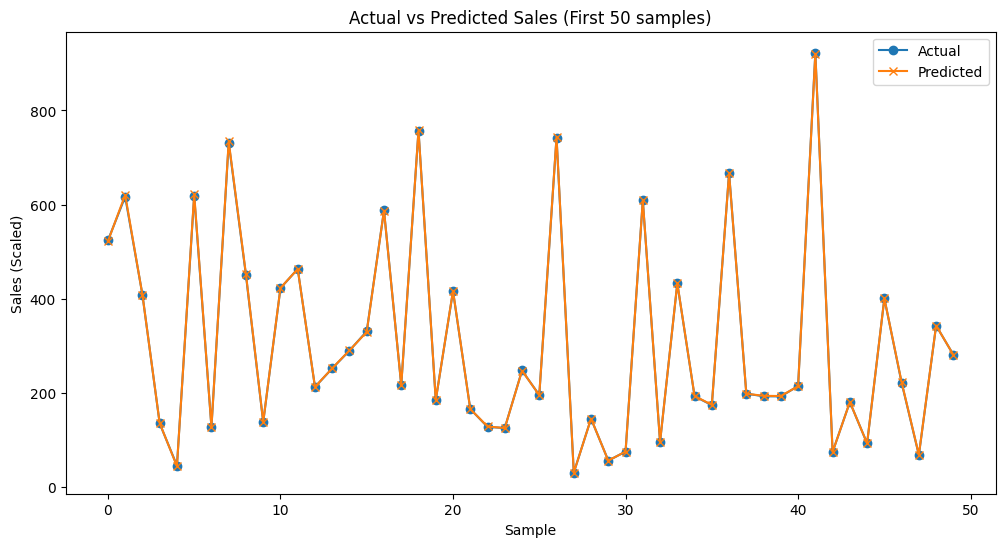

In [9]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.title('Actual vs Predicted Sales (First 50 samples)')
plt.xlabel('Sample')
plt.ylabel('Sales (Scaled)')
plt.legend()
plt.show()


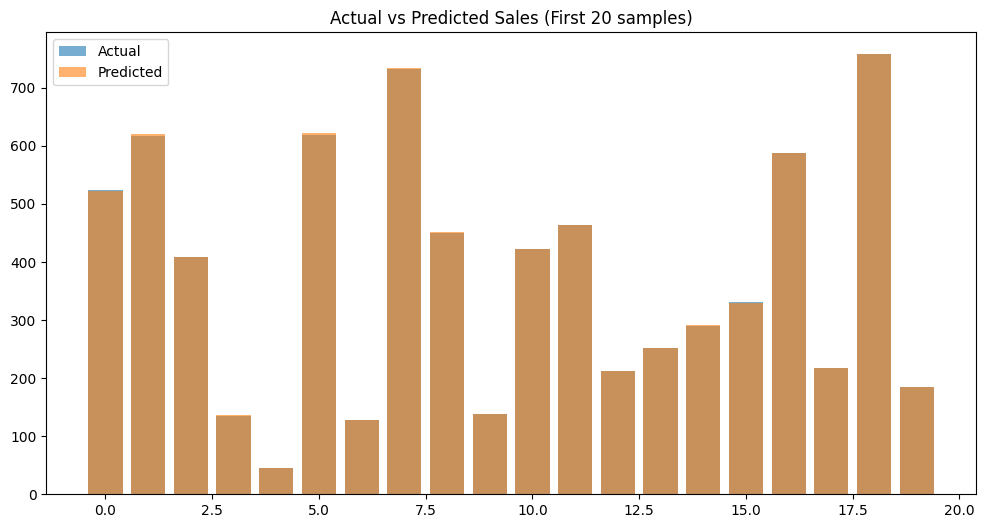

In [10]:
plt.figure(figsize=(12,6))
plt.bar(range(20), y_test.values[:20], alpha=0.6, label='Actual')
plt.bar(range(20), y_pred[:20], alpha=0.6, label='Predicted')
plt.title('Actual vs Predicted Sales (First 20 samples)')
plt.legend()
plt.show()

In [11]:
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.2f}")


R2 Score: 1.00


In [12]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")


MSE: 1.69


In [13]:
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")


MAE: 0.76


In [15]:
# Drop columns that are directly related to sales
X = df.drop(['Sales','Tax 5%'], axis=1)  # don't use Tax_5% because it depends on Sales
y = df['Sales']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")


R2 Score: 1.00
MSE: 64.88
MAE: 5.17


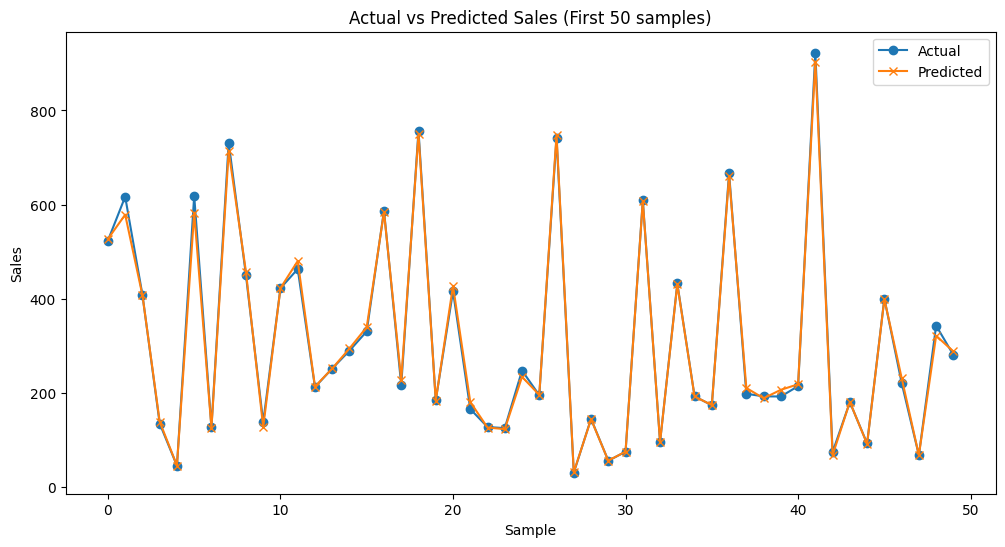

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.title('Actual vs Predicted Sales (First 50 samples)')
plt.xlabel('Sample')
plt.ylabel('Sales')
plt.legend()
plt.show()


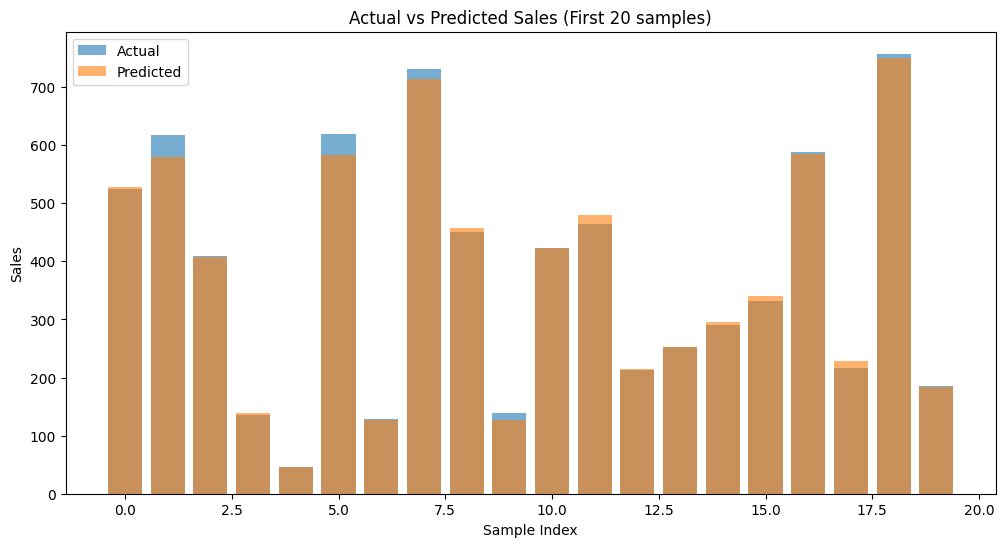

In [20]:
import matplotlib.pyplot as plt

# Bar graph - compare Actual vs Predicted Sales (first 20 samples)
plt.figure(figsize=(12,6))

# Plot Actual Sales
plt.bar(range(20), y_test.values[:20], alpha=0.6, label='Actual')

# Plot Predicted Sales
plt.bar(range(20), y_pred[:20], alpha=0.6, label='Predicted')

plt.title('Actual vs Predicted Sales (First 20 samples)')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.show()
